In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from scipy import stats
from IPython.display import display, HTML

In [ ]:
# Load file Excel
file_path = r'C:\Users\asus\Documents\habibie\FIS 6\
    data_bersih_rev_baru_4.xlsx'  # Sesuaikan dengan lokasi file
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
data_sheets = {sheet: xls.parse(sheet) for sheet in sheet_names}

In [4]:
# Combine data & tambahkan kolom tahun
combined_data = pd.DataFrame()
for sheet, df in data_sheets.items():
    df['TAHUN'] = int(float(sheet))
    combined_data = pd.concat([combined_data, df], ignore_index=True)

In [5]:
# Pastikan TARIF numerik
combined_data['PRICE_REG'] = pd.to_numeric(combined_data['PRICE_REG'], errors='coerce')
print (combined_data)

                    FULLNAME  \
0            ARRY JANUARIZKY   
1          FAJAR DWI SANTOSO   
2     RISANG GALIH BHAKTIAJI   
3           HERMAWAN SUKARNO   
4           HERMAWAN SUKARNO   
...                      ...   
2698        NANANG KURNIAWAN   
2699        NANANG KURNIAWAN   
2700        NANANG KURNIAWAN   
2701        NANANG KURNIAWAN   
2702         ARRY JANUARIZKY   

                                            FITUR_GROUP  \
0                     Public Switched Telephone Network   
1                     Public Switched Telephone Network   
2                       Telekomunikasi Berbasis Satelit   
3                          Short Range Device/Low power   
4                          Short Range Device/Low power   
...                                                 ...   
2698                                           Body SAR   
2699                                           Head SAR   
2700          Pesawat Telepon Seluler dan Modem Seluler   
2701                     

In [6]:
# Statistik EQP_NAME_UJI_GROUP per Tahun
eqp_group_stats = combined_data.groupby(['TAHUN', 'FITUR_GROUP']).size().reset_index(name='Frekuensi')
print (eqp_group_stats)

     TAHUN                                        FITUR_GROUP  Frekuensi
0     2023                                            Antenna          2
1     2023                                        BTS SELULER         11
2     2023                                           Body SAR          1
3     2023  Electromagnetic Compatibility & Electrical Safety          2
4     2023                                           Head SAR          1
..     ...                                                ...        ...
106   2025                       rlan / wlan tipe 1 (5,8 ghz)          1
107   2025                            rlan / wlan vlp (6 ghz)          2
108   2025                   set top box penerima terrestrial          2
109   2025                                   video conference          9
110   2025                             wdm (dwdm multiplexer)          1

[111 rows x 3 columns]


In [7]:
# Statistik deskriptif TARIF per tahun
tarif_stats = combined_data.groupby('TAHUN')['PRICE_REG'].describe()
print (tarif_stats)

        count          mean           std        min        25%        50%  \
TAHUN                                                                        
2023    552.0  7.489130e+06  7.619399e+06  1500000.0  4500000.0  5000000.0   
2024   1596.0  1.699781e+07  2.367622e+07  1500000.0  5000000.0  7000000.0   
2025    555.0  2.134775e+07  2.980912e+07  1500000.0  4500000.0  9000000.0   

              75%          max  
TAHUN                           
2023    7500000.0   70000000.0  
2024   14000000.0  168000000.0  
2025   27750000.0  168000000.0  


In [9]:
from tabulate import tabulate
# Statistik FULLNAME
fullname_summary = combined_data.groupby('FULLNAME').agg(
    Jumlah_Uji=('FULLNAME', 'count'),
    Total_Tarif=('PRICE_REG', 'sum')
).reset_index()
print(tabulate(fullname_summary, headers='keys', tablefmt='grid', showindex=False))

output_path = r'C:\Users\asus\Documents\habibie\FIS 6\nama_statistik_penguji_rev.xlsx'
fullname_summary.to_excel(output_path, index=False)

print (f"File berhasil disimpansebagai: {output_path}")

+------------------------------------+--------------+---------------+
| FULLNAME                           |   Jumlah_Uji |   Total_Tarif |
+====================================+==============+===============+
| ADAM MUHAMMAD SYECH MOLEK          |          140 |     798000000 |
+------------------------------------+--------------+---------------+
| AFRAN MARTAN FITRAWAN              |           29 |     157000000 |
+------------------------------------+--------------+---------------+
| AGUS ARIEF BAHTIAR                 |           16 |      97500000 |
+------------------------------------+--------------+---------------+
| AHMAD SINGGIH PURWADI              |          135 |    1062500000 |
+------------------------------------+--------------+---------------+
| ALFIAN DANI NURULHUDA              |           98 |     688500000 |
+------------------------------------+--------------+---------------+
| ALIF AHMAD SYAMSUDDUHA             |          163 |    6458500000 |
+-------------------

In [10]:
with pd.ExcelWriter(r'C:\Users\asus\Documents\habibie\FIS 6\nama_statistik_penguji_pertahun_6_FIX.xlsx') as writer:
    for tahun in combined_data['TAHUN'].unique():
        data_tahun = combined_data[combined_data['TAHUN'] == tahun]
        summary = data_tahun.groupby('FULLNAME').agg(
            Jumlah_Uji=('FULLNAME', 'count'),
            Total_Tarif=('PRICE_REG', 'sum')
        ).reset_index()
        summary.to_excel(writer, sheet_name=str(tahun), index=False)

In [ ]:
top10_jumlah_uji = fullname_summary.sort_values(
    by='Jumlah_Uji', ascending=False).head(10)
bottom10_jumlah_uji = fullname_summary.sort_values(
    by='Jumlah_Uji', ascending=True).head(10)
top10_total_tarif = fullname_summary.sort_values(
    by='Total_Tarif', ascending=False).head(10)
bottom10_total_tarif = fullname_summary.sort_values(
    by='Total_Tarif', ascending=True).head(10)

In [12]:
# Visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_9608\1186181248.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_eqp_2023, y="FITUR_GROUP", x="Frekuensi", palette="viridis")
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\1186181248.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_eqp_2024, y="FITUR_GROUP", x="Frekuensi", palette="mako")
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\1186181248.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_eqp_2025, y="FITUR_GROUP", x="Frekuensi", pa

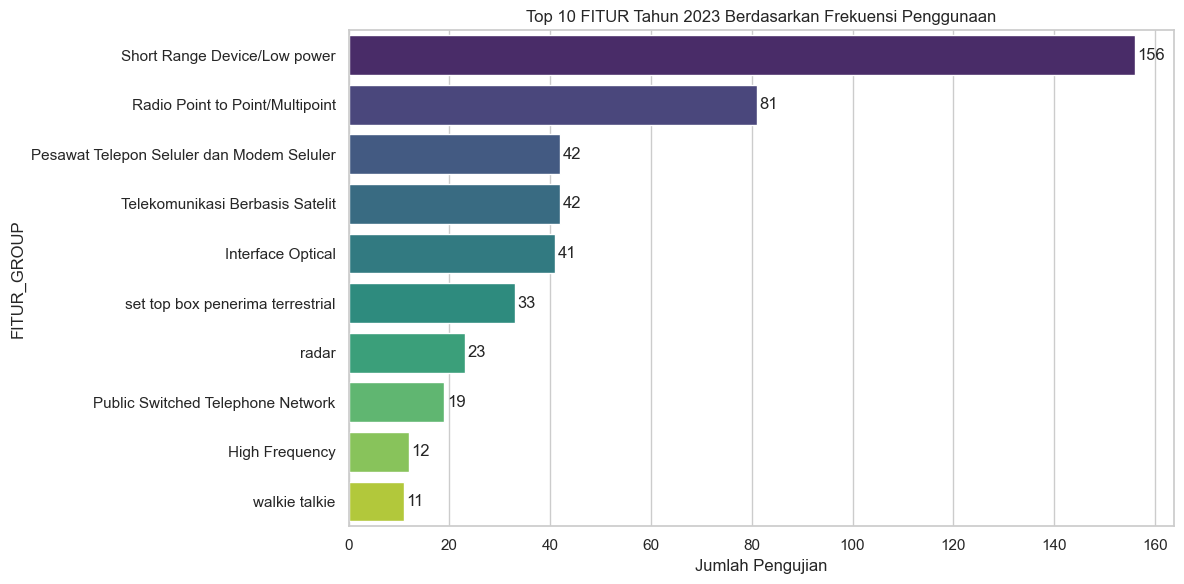

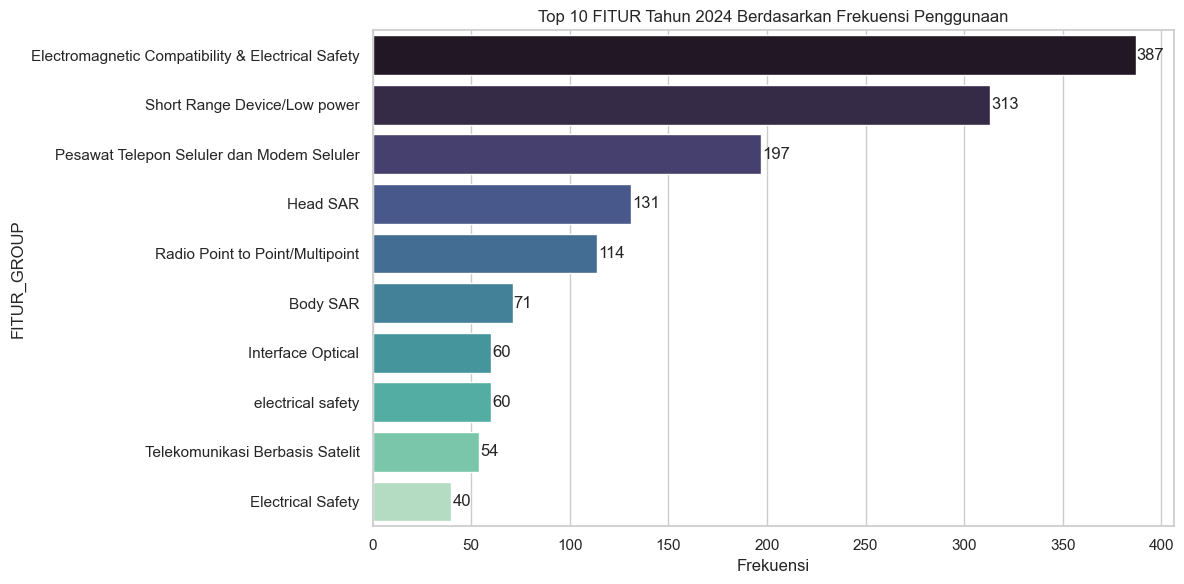

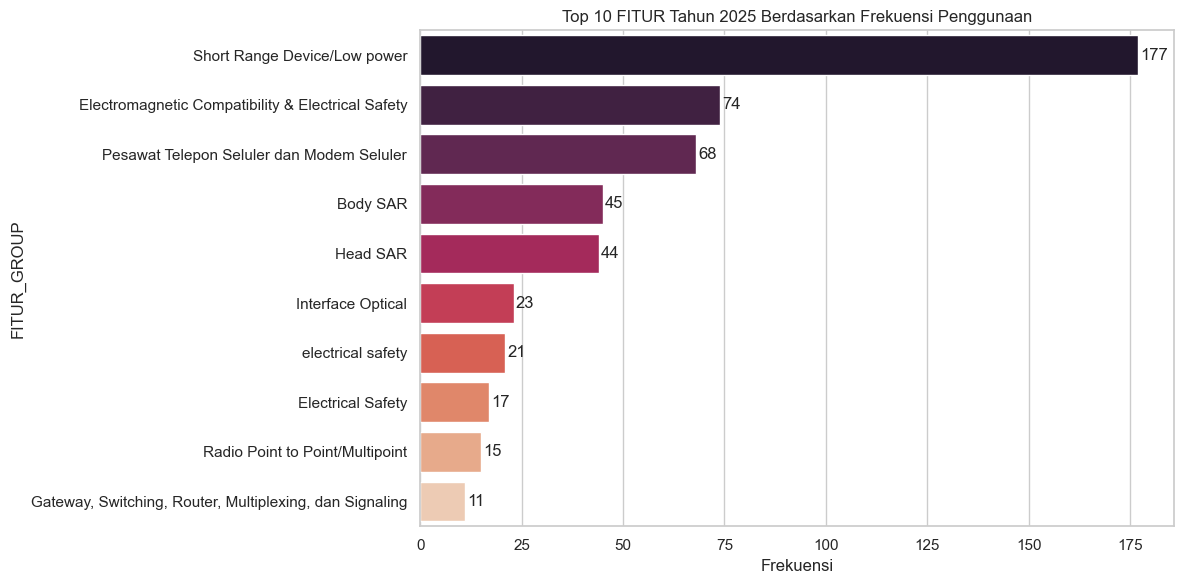

In [15]:
# # 1. EQP_NAME_UJI_GROUP Top 10 Tahun 2023
# top10_eqp_2023 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2023].sort_values(by="Frekuensi", ascending=False).head(10)
# plt.figure()
# ax = sns.barplot(data=top10_eqp_2023, y="FITUR_GROUP", x="Jumlah_Uji", palette="viridis")
# # sns.barplot(data=top10_eqp_2023, y="FITUR_GROUP", x="Frekuensi", palette="viridis")
# plt.title("Top 10 FITUR Tahun 2023 Berdasarkan Frekuensi Penggunaan")
# plt.xlabel("Frekuensi")
# plt.ylabel("FITUR_GROUP")
# plt.tight_layout()
# plt.savefig("top10_eqp_2023.png")

# # 2. EQP_NAME_UJI_GROUP tOP 10 Tahun 2024
# top10_eqp_2024 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2024].sort_values(by="Frekuensi", ascending =False).head(10)
# plt.figure()
# sns.barplot(data=top10_eqp_2024, y="FITUR_GROUP", x="Frekuensi", palette="mako")
# plt.title("Top 10 FITUR_GROUP Tahun 2024 Berdasarkan Frekuensi Penggunaan")
# plt.xlabel("Frekuensi")
# plt.ylabel("FITUR_GROUP")
# plt.tight_layout()
# plt.savefig("top10_eqp_2024.png")

# # 3. EQP_UJI_NAME_GROUP Top 10 Tahun 2025
# top10_eqp_2025 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2025].sort_values(by="Frekuensi", ascending=False).head(10)
# plt.figure()
# sns.barplot(data=top10_eqp_2025, y="FITUR_GROUP", x="Frekuensi", palette="rocket")
# plt.title("Top 10 FITUR_GROUP Tahun 2025 Berdasarkan Frekuensi Penggunaan")
# plt.xlabel("Frekuensi")
# plt.ylabel("FITUR_GROUP")
# plt.tight_layout()
# plt.savefig("top10_eqp_2025.png")



# Fungsi bantu untuk menambahkan label pada bar
def add_labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5,                # posisi x (geser sedikit ke kanan)
                p.get_y() + p.get_height()/2,  # posisi y (tengah bar)
                f'{width:.0f}',             # isi label (dibulatkan)
                va='center')                # vertical alignment tengah

# 1. Tahun 2023
top10_eqp_2023 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2023].sort_values(by="Frekuensi", ascending=False).head(10)
plt.figure()
ax = sns.barplot(data=top10_eqp_2023, y="FITUR_GROUP", x="Frekuensi", palette="viridis")
plt.title("Top 10 FITUR Tahun 2023 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Jumlah Pengujian")
plt.ylabel("FITUR_GROUP")
add_labels(ax)  # Tambahkan label
plt.tight_layout()
plt.savefig("top10_eqp_2023.png")

# 2. Tahun 2024
top10_eqp_2024 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2024].sort_values(by="Frekuensi", ascending=False).head(10)
plt.figure()
ax = sns.barplot(data=top10_eqp_2024, y="FITUR_GROUP", x="Frekuensi", palette="mako")
plt.title("Top 10 FITUR Tahun 2024 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Frekuensi")
plt.ylabel("FITUR_GROUP")
add_labels(ax)  # Tambahkan label
plt.tight_layout()
plt.savefig("top10_eqp_2024.png")

# 3. Tahun 2025
top10_eqp_2025 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2025].sort_values(by="Frekuensi", ascending=False).head(10)
plt.figure()
ax = sns.barplot(data=top10_eqp_2025, y="FITUR_GROUP", x="Frekuensi", palette="rocket")
plt.title("Top 10 FITUR Tahun 2025 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Frekuensi")
plt.ylabel("FITUR_GROUP")
add_labels(ax)  # Tambahkan label
plt.tight_layout()
plt.savefig("top10_eqp_2025.png")


C:\Users\asus\AppData\Local\Temp\ipykernel_9608\1092641295.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_eqp_2023, y="FITUR_GROUP", x="Frekuensi", palette="viridis")
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\1092641295.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_eqp_2024, y="FITUR_GROUP", x="Frekuensi", palette="mako")
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\1092641295.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_eqp_2025, y="FITUR_GROUP", x="Freku

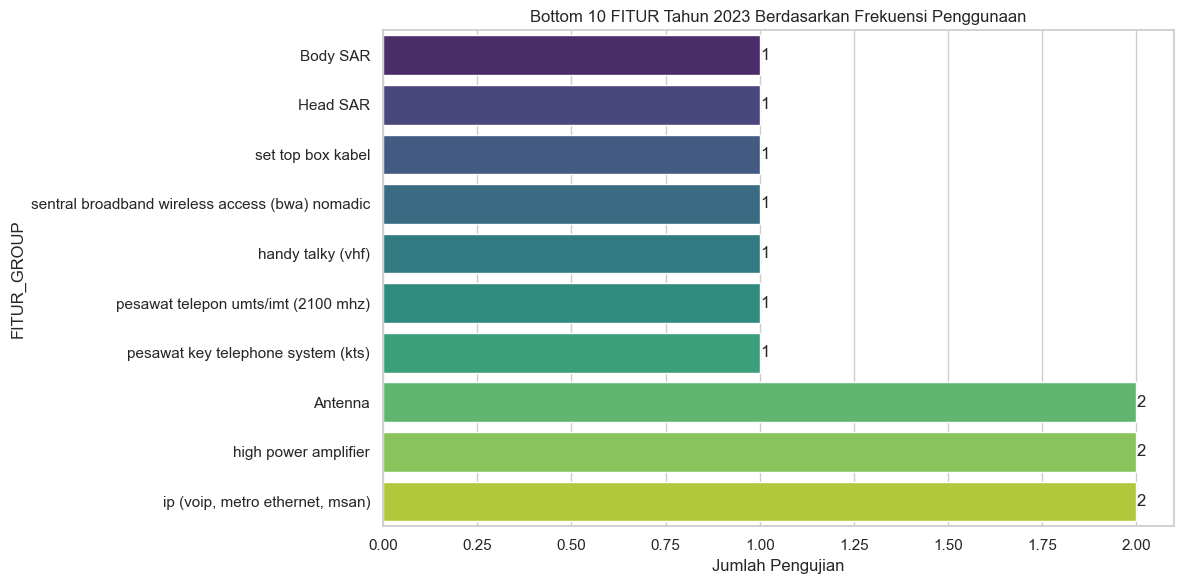

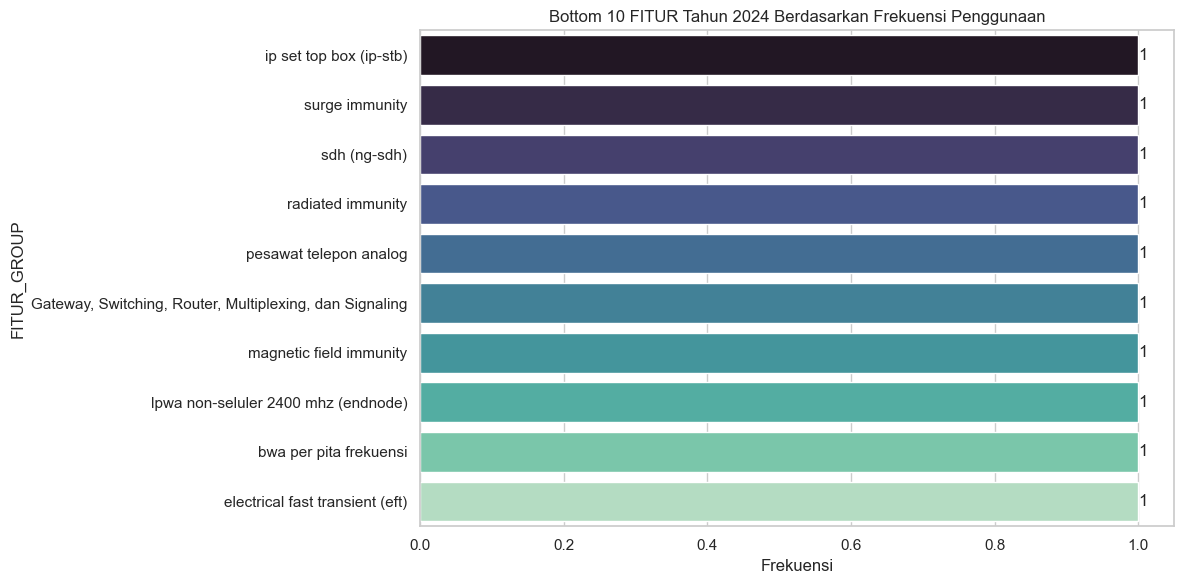

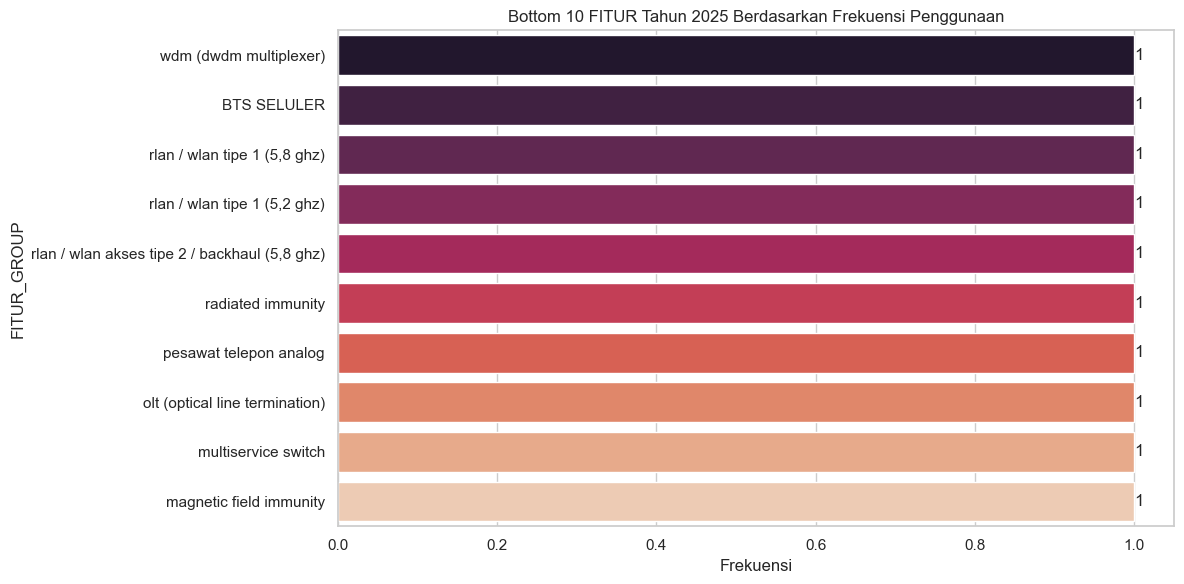

In [16]:
# Fungsi tambah label (misal label nilai batang)
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

# 1. Tahun 2023 - bottom 10
bottom10_eqp_2023 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2023].sort_values(by="Frekuensi", ascending=True).head(10)
plt.figure()
ax = sns.barplot(data=bottom10_eqp_2023, y="FITUR_GROUP", x="Frekuensi", palette="viridis")
plt.title("Bottom 10 FITUR Tahun 2023 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Jumlah Pengujian")
plt.ylabel("FITUR_GROUP")
add_labels(ax)
plt.tight_layout()
plt.savefig("bottom10_eqp_2023.png")

# 2. Tahun 2024 - bottom 10
bottom10_eqp_2024 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2024].sort_values(by="Frekuensi", ascending=True).head(10)
plt.figure()
ax = sns.barplot(data=bottom10_eqp_2024, y="FITUR_GROUP", x="Frekuensi", palette="mako")
plt.title("Bottom 10 FITUR Tahun 2024 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Frekuensi")
plt.ylabel("FITUR_GROUP")
add_labels(ax)
plt.tight_layout()
plt.savefig("bottom10_eqp_2024.png")

# 3. Tahun 2025 - bottom 10
bottom10_eqp_2025 = eqp_group_stats[eqp_group_stats["TAHUN"] == 2025].sort_values(by="Frekuensi", ascending=True).head(10)
plt.figure()
ax = sns.barplot(data=bottom10_eqp_2025, y="FITUR_GROUP", x="Frekuensi", palette="rocket")
plt.title("Bottom 10 FITUR Tahun 2025 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Frekuensi")
plt.ylabel("FITUR_GROUP")
add_labels(ax)
plt.tight_layout()
plt.savefig("bottom10_eqp_2025.png")


C:\Users\asus\AppData\Local\Temp\ipykernel_9608\249450609.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_accumulated, y="FITUR_GROUP", x="Frekuensi", palette="crest")


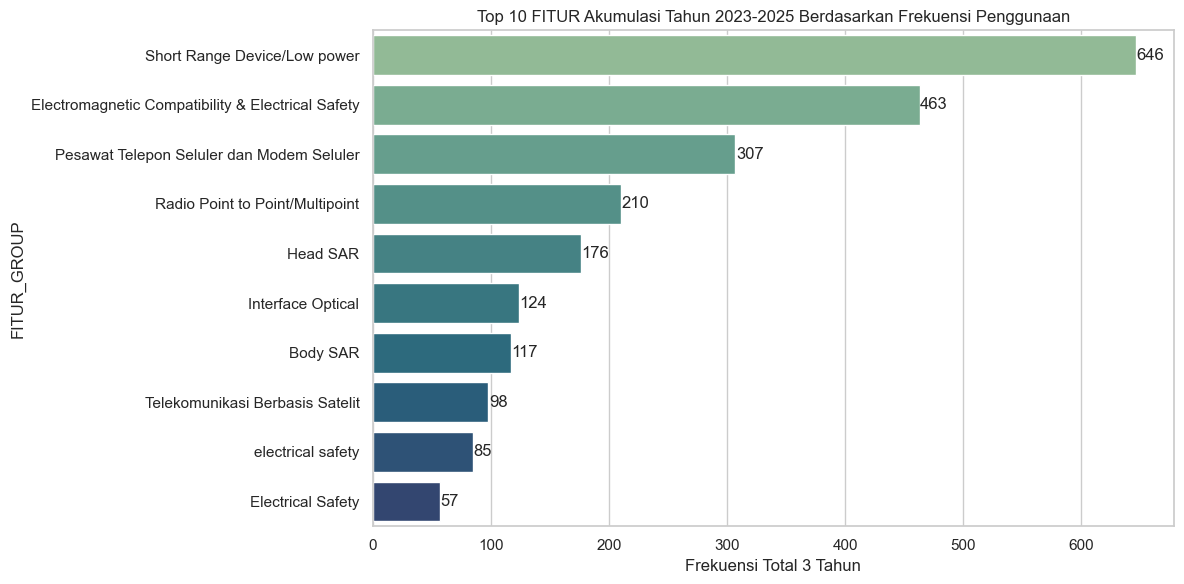

In [ ]:
# Fungsi bantu untuk menambahkan label pada bar
def add_labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5,
                p.get_y() + p.get_height() / 2,
                f'{width:.0f}',
                va='center')

# Filter data untuk tahun 2023, 2024, dan 2025
eqp_3years = eqp_group_stats[eqp_group_stats["TAHUN"].isin([2023, 2024, 2025])]

# Akumulasi frekuensi berdasarkan FITUR_GROUP
accumulated_eqp = eqp_3years.groupby("FITUR_GROUP")["Frekuensi"].sum().reset_index()

# Ambil Top 10 FITUR_GROUP berdasarkan frekuensi tertinggi (akumulasi 3 tahun)
top10_accumulated = accumulated_eqp.sort_values(by="Frekuensi", ascending=False).head(10)

# Plot
plt.figure()
ax = sns.barplot(data=top10_accumulated, y="FITUR_GROUP", x="Frekuensi", palette="crest")
plt.title("Top 10 FITUR Akumulasi Tahun 2023-2025 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Frekuensi Total 3 Tahun")
plt.ylabel("FITUR_GROUP")
add_labels(ax)
plt.tight_layout()
plt.savefig("top10_eqp_accumulated_2023_2025.png")


C:\Users\asus\AppData\Local\Temp\ipykernel_9608\3160052996.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_accumulated, y="FITUR_GROUP", x="Frekuensi", palette="crest")


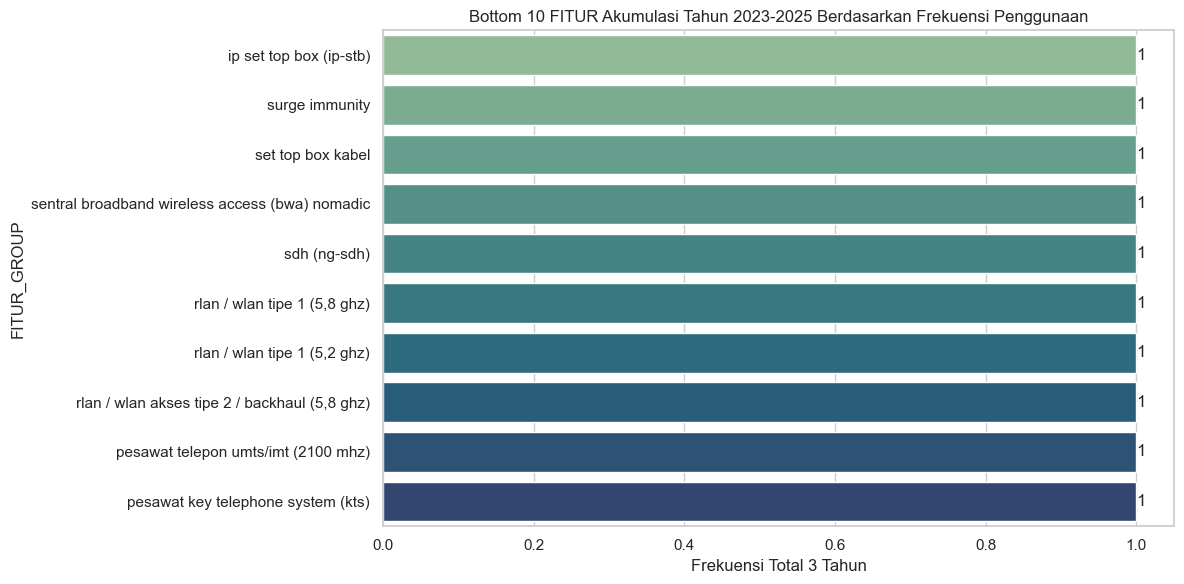

In [20]:
# Fungsi tambah label (misal label nilai batang)
def add_labels(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center')

# Filter data tahun 2023-2025 dan akumulasi frekuensi berdasarkan FITUR_GROUP
eqp_3years = eqp_group_stats[eqp_group_stats["TAHUN"].isin([2023, 2024, 2025])]

# Group by FITUR_GROUP, jumlahkan frekuensi
accumulated_eqp = eqp_3years.groupby("FITUR_GROUP")["Frekuensi"].sum().reset_index()

# Ambil bottom 10 fitur berdasarkan frekuensi terkecil
bottom10_accumulated = accumulated_eqp.sort_values(by="Frekuensi", ascending=True).head(10)

# Plot
plt.figure()
ax = sns.barplot(data=bottom10_accumulated, y="FITUR_GROUP", x="Frekuensi", palette="crest")
plt.title("Bottom 10 FITUR Akumulasi Tahun 2023-2025 Berdasarkan Frekuensi Penggunaan")
plt.xlabel("Frekuensi Total 3 Tahun")
plt.ylabel("FITUR_GROUP")
add_labels(ax)
plt.tight_layout()
plt.savefig("bottom10_eqp_accumulated_2023_2025.png")


C:\Users\asus\AppData\Local\Temp\ipykernel_33752\2782879663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x="TAHUN", y="PRICE_REG", palette="pastel")


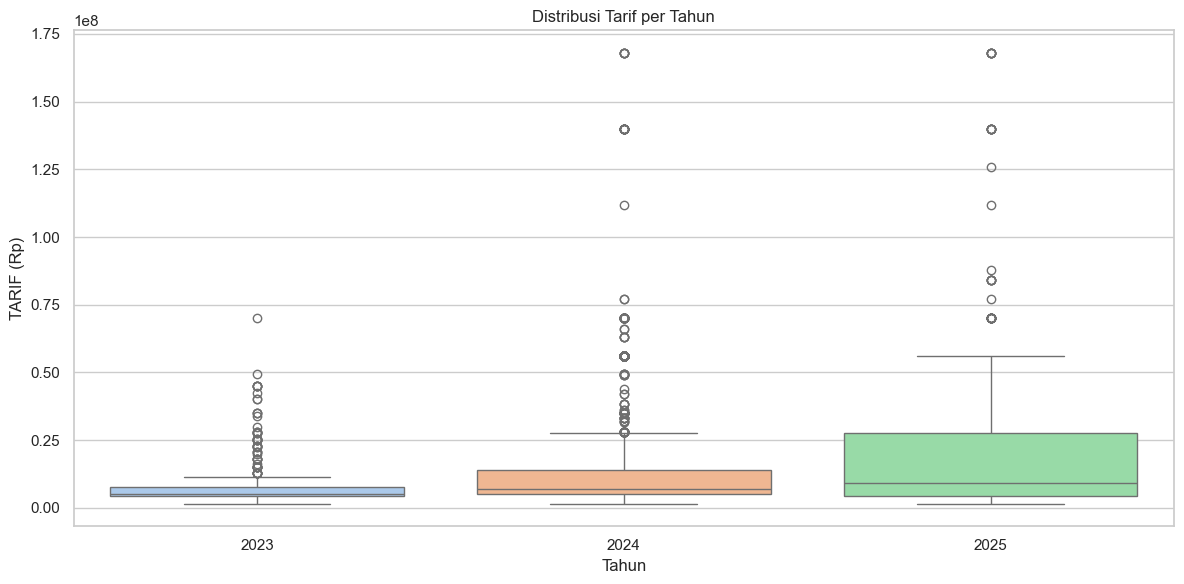

In [15]:
# 2. Boxplot TARIF per Tahun
plt.figure()
sns.boxplot(data=combined_data, x="TAHUN", y="PRICE_REG", palette="pastel")
plt.title("Distribusi Tarif per Tahun")
plt.ylabel("TARIF (Rp)")
plt.xlabel("Tahun")
plt.tight_layout()
plt.savefig("boxplot_tarif_per_tahun.png")

C:\Users\asus\AppData\Local\Temp\ipykernel_33752\1209927394.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=akumulasi_uji_per_tahun, x="TAHUN", y="Total_Jumlah_Uji", palette="Blues_d")


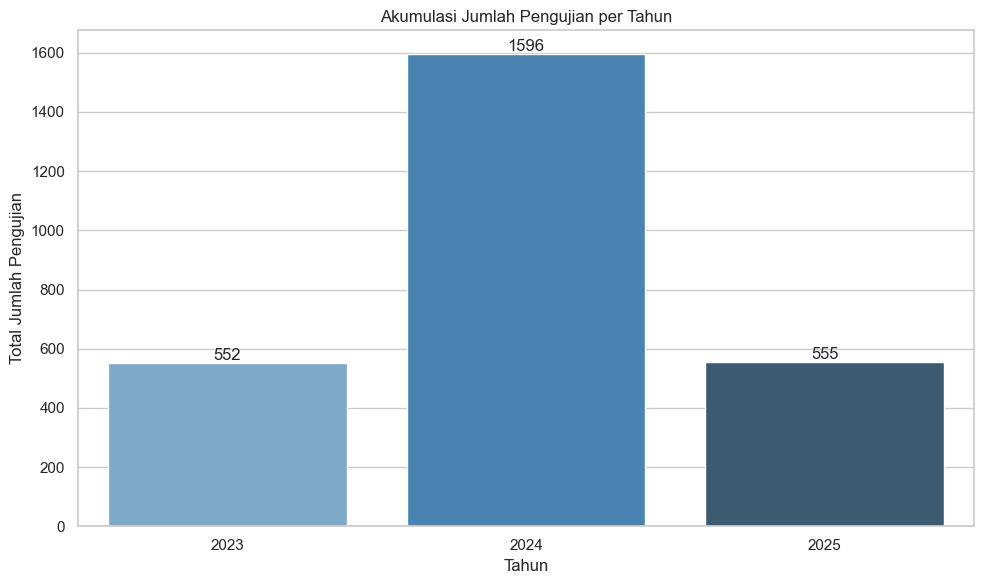

In [28]:
# Akumulasi jumlah pengujian per tahun
akumulasi_uji_per_tahun = combined_data.groupby("TAHUN").size().reset_index(name="Total_Jumlah_Uji")

# Plot grafik
plt.figure(figsize=(10, 6))
sns.barplot(data=akumulasi_uji_per_tahun, x="TAHUN", y="Total_Jumlah_Uji", palette="Blues_d")
plt.title("Akumulasi Jumlah Pengujian per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Jumlah Pengujian")

# Tambahkan label pada bar
for i, row in akumulasi_uji_per_tahun.iterrows():
    plt.text(i, row["Total_Jumlah_Uji"], f'{row["Total_Jumlah_Uji"]}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("akumulasi_jumlah_uji_per_tahun.png")
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_33752\2056255393.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=akumulasi_tarif_per_tahun, x="TAHUN", y="Total_Tarif_Juta", palette="viridis")


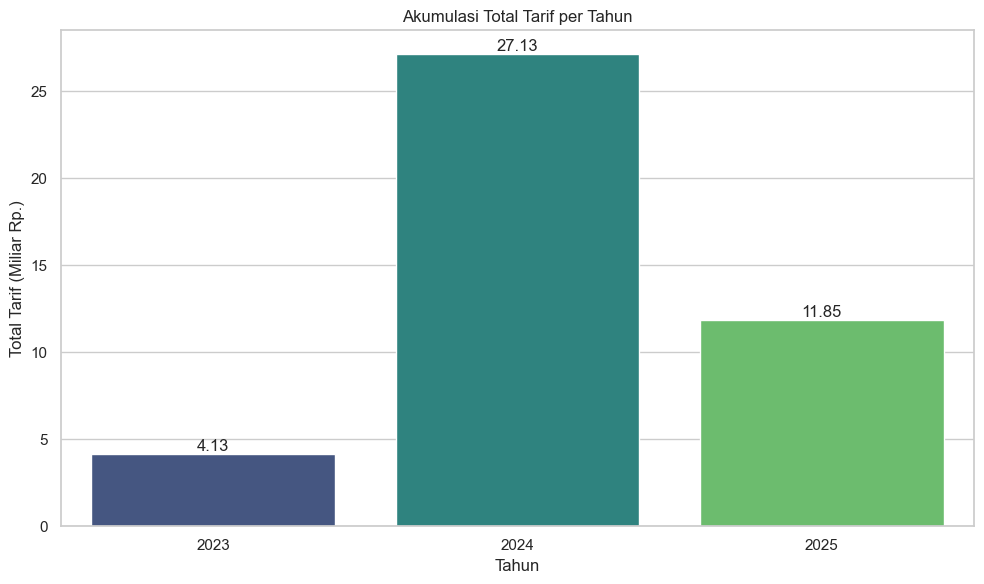

In [33]:
# Akumulasi total tarif per tahun
akumulasi_tarif_per_tahun = tarif_per_tahun.groupby("TAHUN")["Total_Tarif"].sum().reset_index()
akumulasi_tarif_per_tahun["Total_Tarif_Juta"] = akumulasi_tarif_per_tahun["Total_Tarif"] / 1e9

# Plot grafik
plt.figure(figsize=(10, 6))
sns.barplot(data=akumulasi_tarif_per_tahun, x="TAHUN", y="Total_Tarif_Juta", palette="viridis")
plt.title("Akumulasi Total Tarif per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Tarif (Miliar Rp.)")

# Tambahkan label pada bar
for i, row in akumulasi_tarif_per_tahun.iterrows():
    plt.text(i, row["Total_Tarif_Juta"], f'{row["Total_Tarif_Juta"]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("akumulasi_total_tarif_per_tahun.png")
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_9608\991929979.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d")
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\991929979.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Reds_d")


ValueError: Could not interpret value `FITUR_GROUP` for `y`. An entry with this name does not appear in `data`.

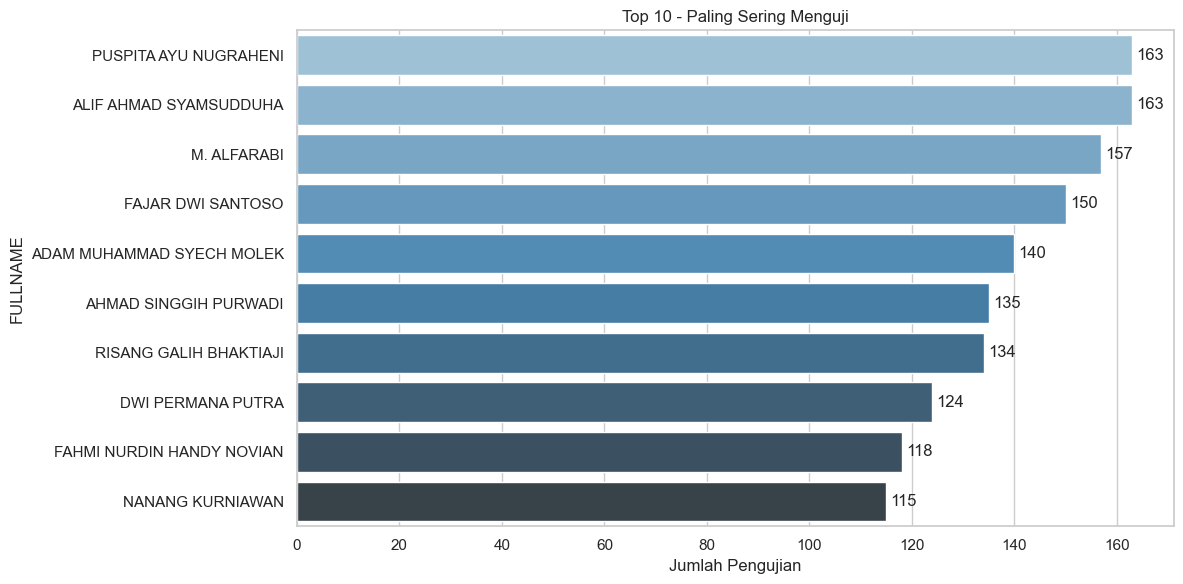

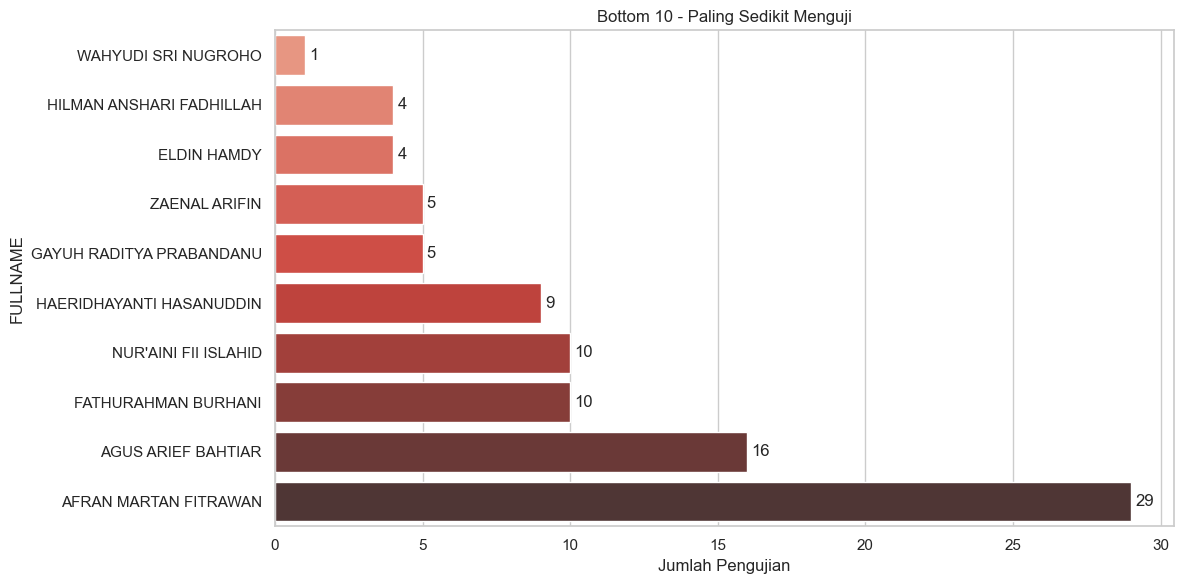

<Figure size 1200x600 with 0 Axes>

In [29]:


# 3. Top 10 - Paling Sering Menguji
plt.figure()
ax = sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d")
plt.title("Top 10 - Paling Sering Menguji")
plt.xlabel("Jumlah Pengujian")
plt.ylabel("FULLNAME")

# Tambahkan label ke setiap batang
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.savefig("top10_jumlah_uji.png")

# 4. Bottom 10 - Paling Sedikit Menguji
plt.figure()
ax = sns.barplot(data=bottom10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Reds_d")
plt.title("Bottom 10 - Paling Sedikit Menguji")
plt.xlabel("Jumlah Pengujian")
plt.ylabel("FULLNAME")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.savefig("bottom10_jumlah_uji.png")


# 5. Top 10 - Total Tarif Tertinggi
plt.figure()
ax = sns.barplot(data=top10_total_tarif, y="FITUR_GROUP", x="Total_Tarif", palette="Greens_d")
plt.title("Top 10 - Total Tarif Tertinggi (2023–2025)")
plt.xlabel("Total Tarif (Rp)")
plt.ylabel("Fitur")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.savefig("top10_total_tarif.png")


# 6. Bottom 10 - Total Tarif Terendah
plt.figure()
ax = sns.barplot(data=bottom10_total_tarif, y="FITUR_GROUP", x="Total_Tarif", palette="Oranges_d")
plt.title("Bottom 10 - Total Tarif Terendah (2023–2025)")
plt.xlabel("Total Tarif (Rp)")
plt.ylabel("Fitur")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.savefig("bottom10_total_tarif.png")



C:\Users\asus\AppData\Local\Temp\ipykernel_9608\4055601545.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d")


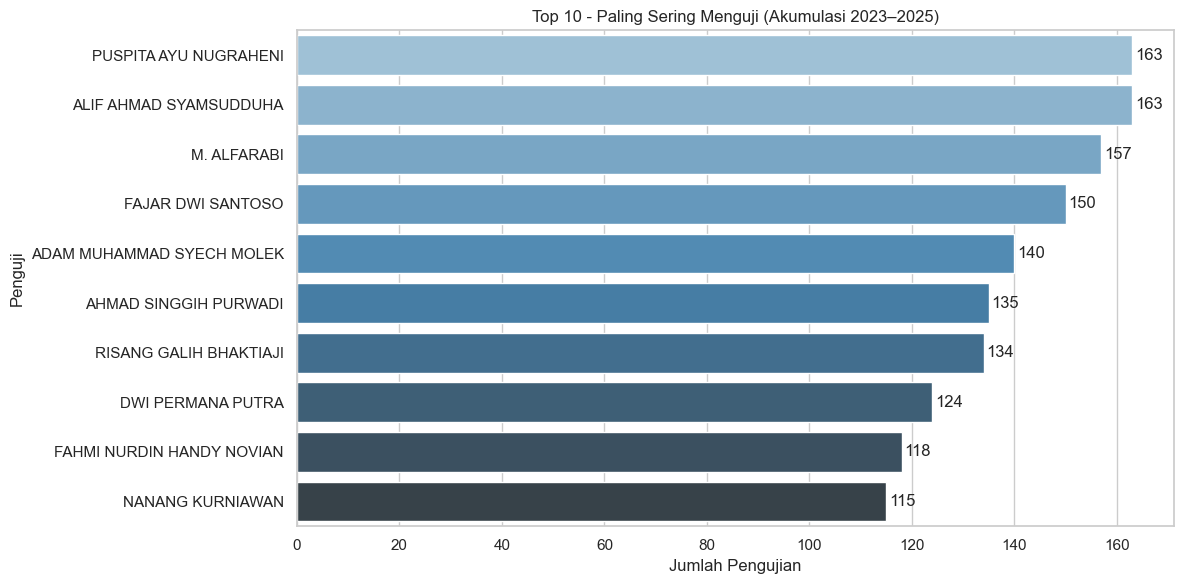

In [26]:
# # Fungsi bantu untuk menambahkan label pada bar
# def add_labels(ax):
#     for p in ax.patches:
#         width = p.get_width()
#         ax.text(width + 0.5,
#                 p.get_y() + p.get_height() / 2,
#                 f'{width:.0f}',
#                 va='center')

# # Filter data untuk tahun 2023, 2024, dan 2025
# eqp_3years = eqp_group_stats[eqp_group_stats["TAHUN"].isin([2023, 2024, 2025])]

# # Akumulasi frekuensi berdasarkan FITUR_GROUP
# accumulated_eqp = eqp_3years.groupby("FULLNAME")["Frekuensi"].sum().reset_index()

# # Ambil Top 10 FITUR_GROUP berdasarkan frekuensi tertinggi (akumulasi 3 tahun)
# top10_jumlah_uji = accumulated_eqp.sort_values(by="Frekuensi", ascending=False).head(10)

# # Plot
# # 3. Top 10 - Paling Sering Menguji
# plt.figure()
# sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Frekuensi", palette="Blues_d")
# plt.title("Top 10 - Paling Sering Menguji")
# plt.xlabel("Jumlah Pengujian")
# plt.ylabel("Penguji")
# plt.tight_layout()
# plt.savefig("top10_jumlah_uji.png")

# Fungsi bantu untuk menambahkan label pada bar
def add_labels(ax):
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5,
                p.get_y() + p.get_height() / 2,
                f'{width:.0f}',
                va='center')

# Buat dataframe jumlah pengujian per tahun dan nama
fullname_per_tahun = combined_data.groupby(['TAHUN', 'FULLNAME']).size().reset_index(name='Jumlah_Uji')

# Akumulasi jumlah pengujian selama 2023–2025 berdasarkan FULLNAME
fullname_akumulasi = fullname_per_tahun.groupby('FULLNAME')['Jumlah_Uji'].sum().reset_index()

# Ambil Top 10
top10_jumlah_uji = fullname_akumulasi.sort_values(by="Jumlah_Uji", ascending=False).head(10)

# Plot Top 10
plt.figure()
ax = sns.barplot(data=top10_jumlah_uji, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d")
plt.title("Top 10 - Paling Sering Menguji (Akumulasi 2023–2025)")
plt.xlabel("Jumlah Pengujian")
plt.ylabel("Penguji")
add_labels(ax)
plt.tight_layout()
plt.savefig("top10_jumlah_uji.png")



C:\Users\asus\AppData\Local\Temp\ipykernel_9608\280514755.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top10, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d", ax=ax)
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\280514755.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=bottom10, y="FULLNAME", x="Jumlah_Uji", palette="Reds_d", ax=ax)
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\280514755.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top10, y="FULLNAME", x="Jumlah_Uji", pale

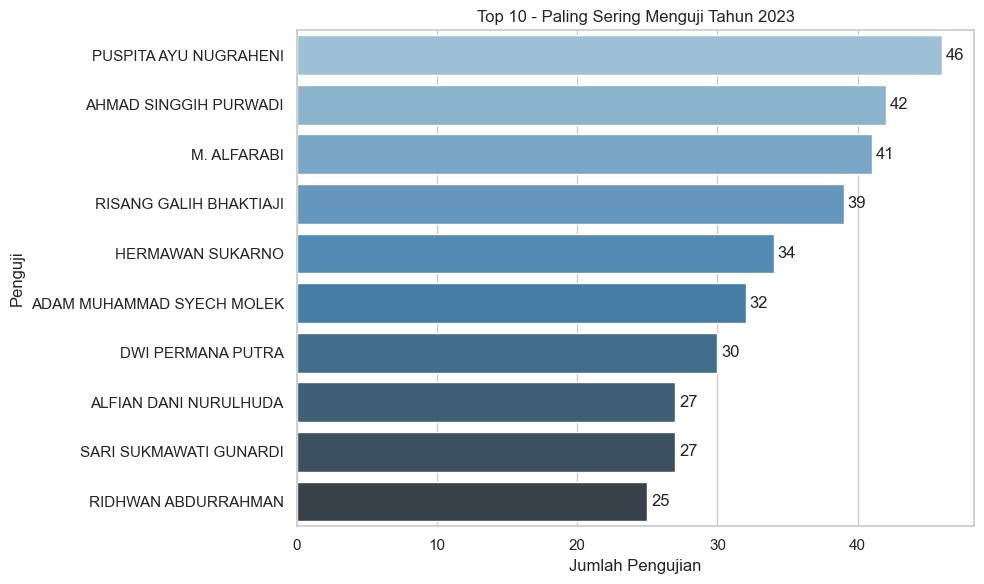

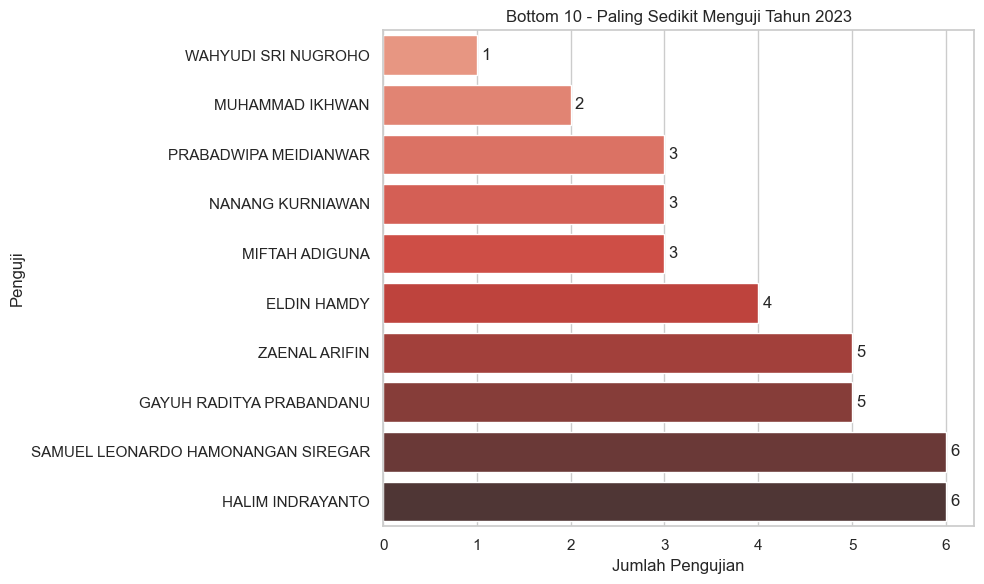

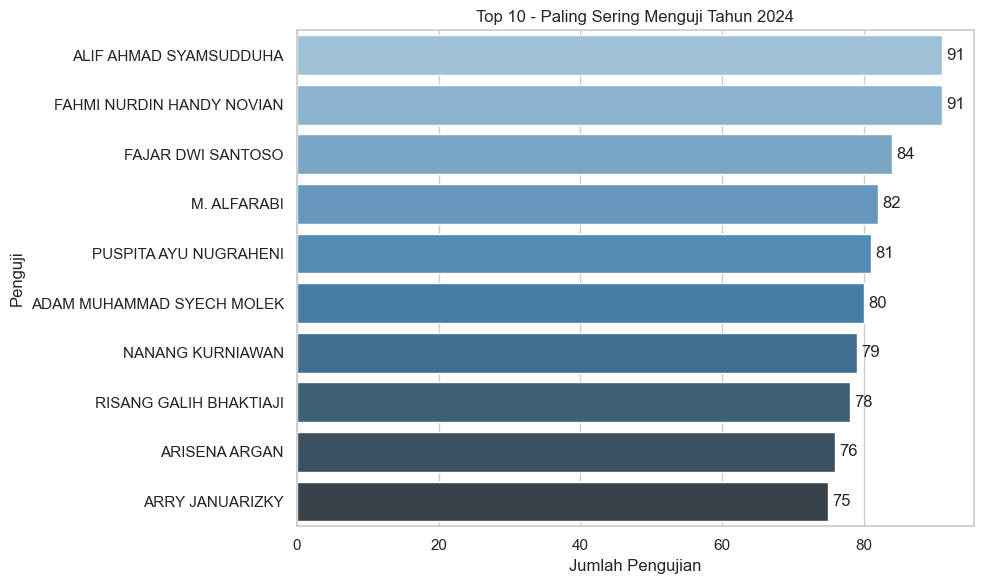

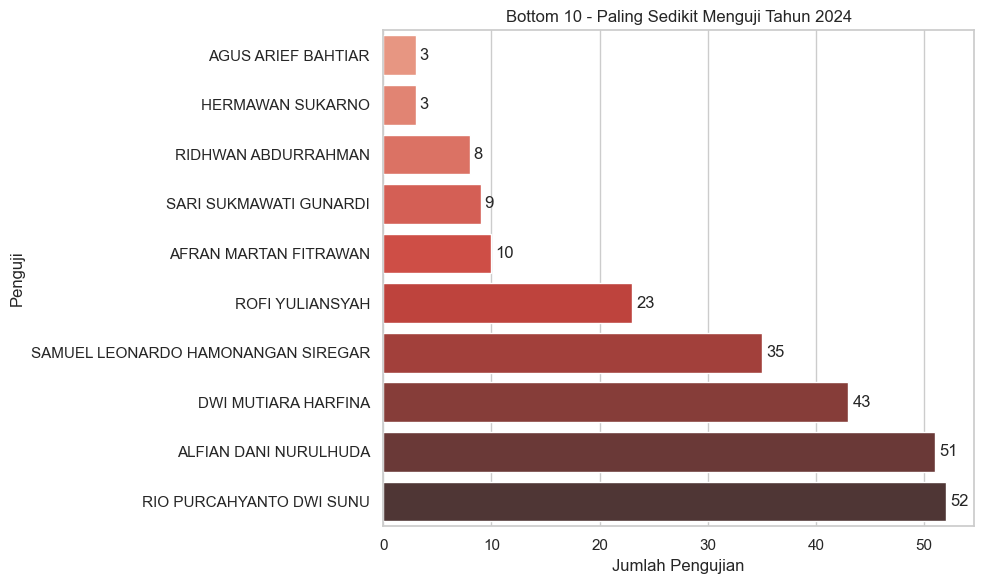

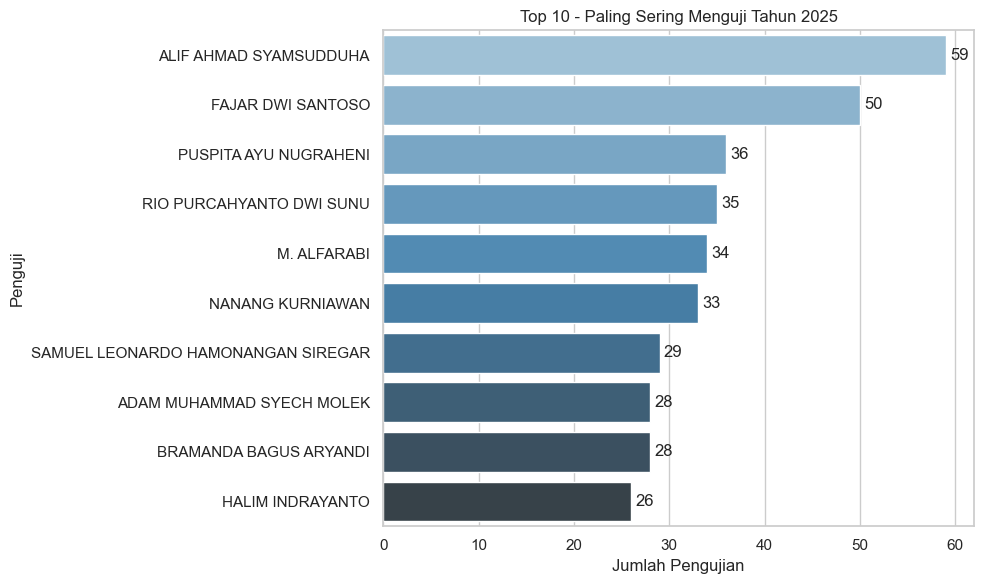

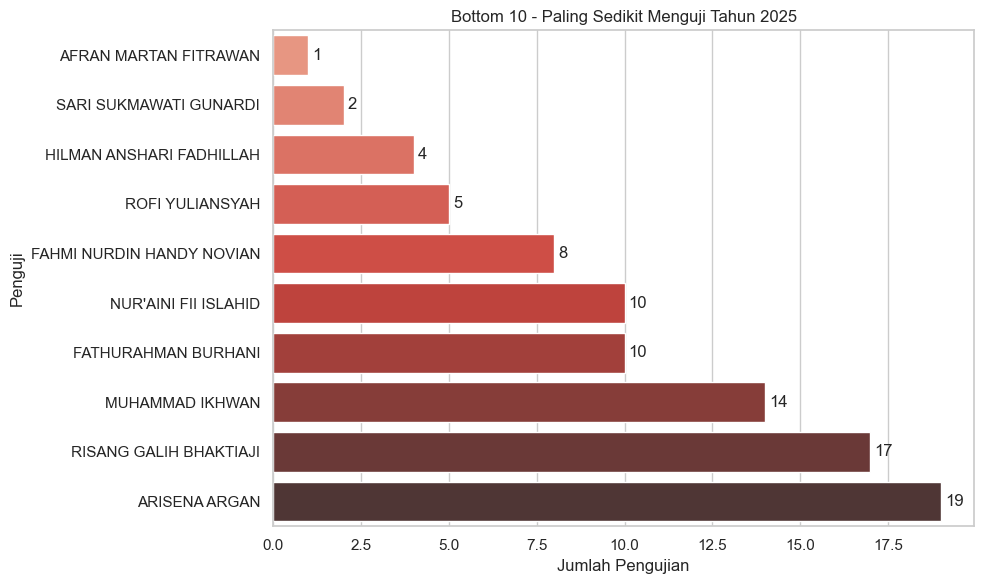

In [27]:
# Buat dataframe jumlah pengujian per tahun dan nama
fullname_per_tahun = combined_data.groupby(['TAHUN', 'FULLNAME']).size().reset_index(name='Jumlah_Uji')

# Loop tiap tahun dan simpan grafik top 10 & bottom 10
tahun_list = sorted(fullname_per_tahun['TAHUN'].unique())

for tahun in tahun_list:
    data_tahun = fullname_per_tahun[fullname_per_tahun['TAHUN'] == tahun]

    # --- Top 10 ---
    top10 = data_tahun.sort_values(by='Jumlah_Uji', ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(10, 6))
    barplot = sns.barplot(data=top10, y="FULLNAME", x="Jumlah_Uji", palette="Blues_d", ax=ax)
    ax.set_title(f"Top 10 - Paling Sering Menguji Tahun {tahun}")
    ax.set_xlabel("Jumlah Pengujian")
    ax.set_ylabel("Penguji")

    # Tambahkan label ke setiap bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

    plt.tight_layout()
    plt.savefig(f"top10_jumlah_uji_{tahun}.png")


    # --- Bottom 10 ---
    bottom10 = data_tahun.sort_values(by='Jumlah_Uji', ascending=True).head(10)
    fig, ax = plt.subplots(figsize=(10, 6))
    barplot = sns.barplot(data=bottom10, y="FULLNAME", x="Jumlah_Uji", palette="Reds_d", ax=ax)
    ax.set_title(f"Bottom 10 - Paling Sedikit Menguji Tahun {tahun}")
    ax.set_xlabel("Jumlah Pengujian")
    ax.set_ylabel("Penguji")

    # Tambahkan label ke setiap bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

    plt.tight_layout()
    plt.savefig(f"bottom10_jumlah_uji_{tahun}.png")
    



C:\Users\asus\AppData\Local\Temp\ipykernel_33752\2329666266.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_tarif, y="FITUR_GROUP", x="Total_Tarif", palette="Greens_d")
C:\Users\asus\AppData\Local\Temp\ipykernel_33752\2329666266.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_tarif, y="FITUR_GROUP", x="Total_Tarif", palette="Oranges_d")
C:\Users\asus\AppData\Local\Temp\ipykernel_33752\2329666266.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_tarif, y="FITUR_GROUP", x="Total_T

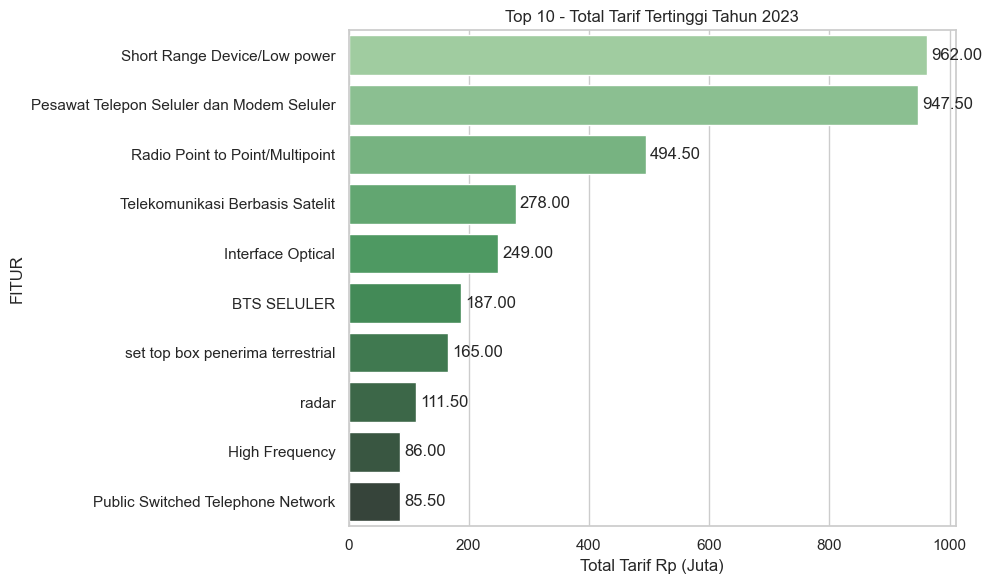

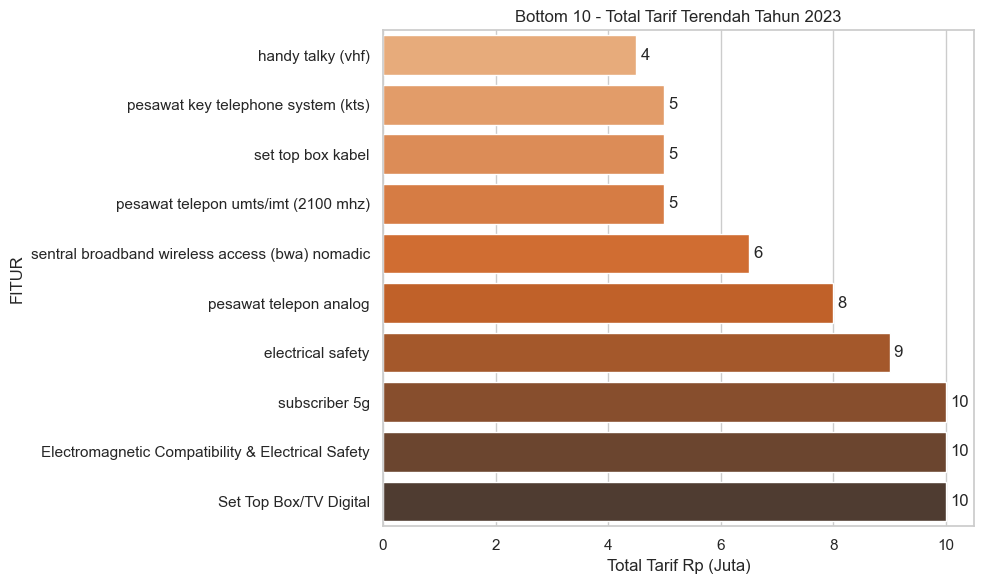

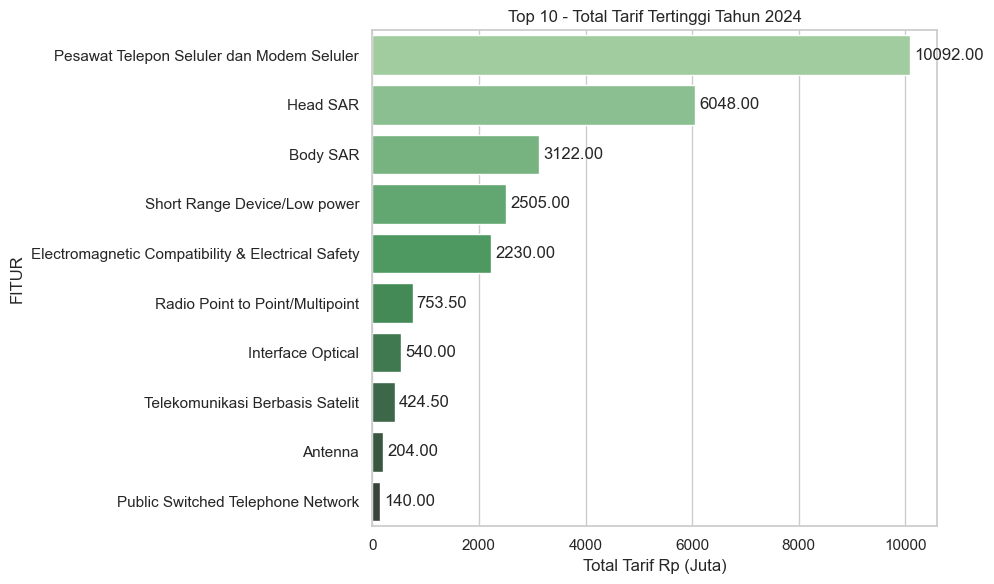

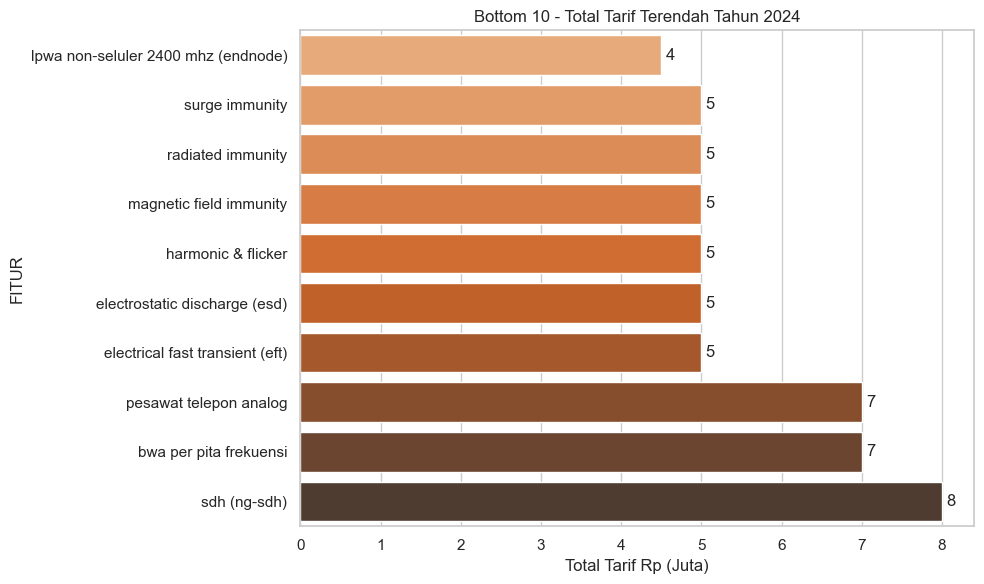

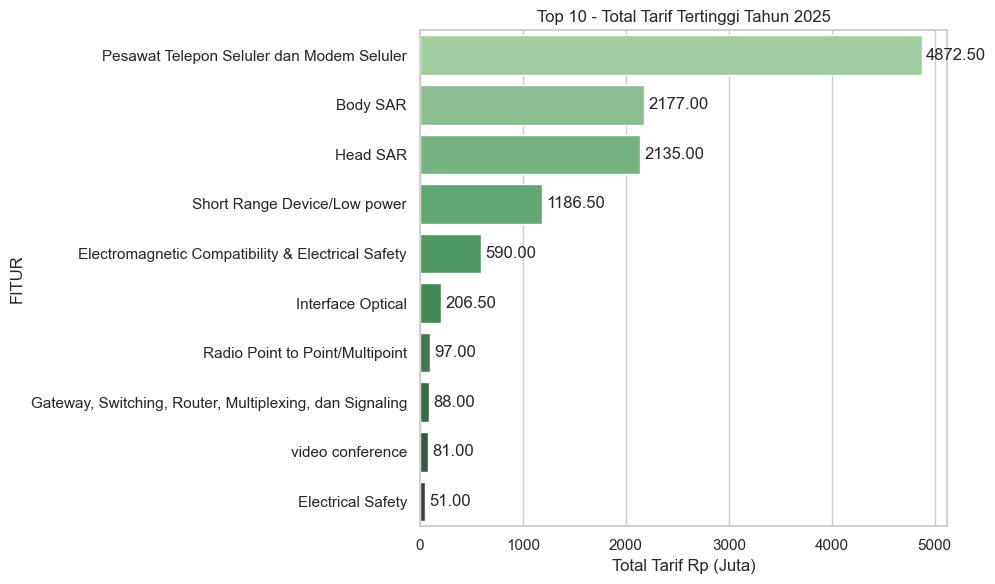

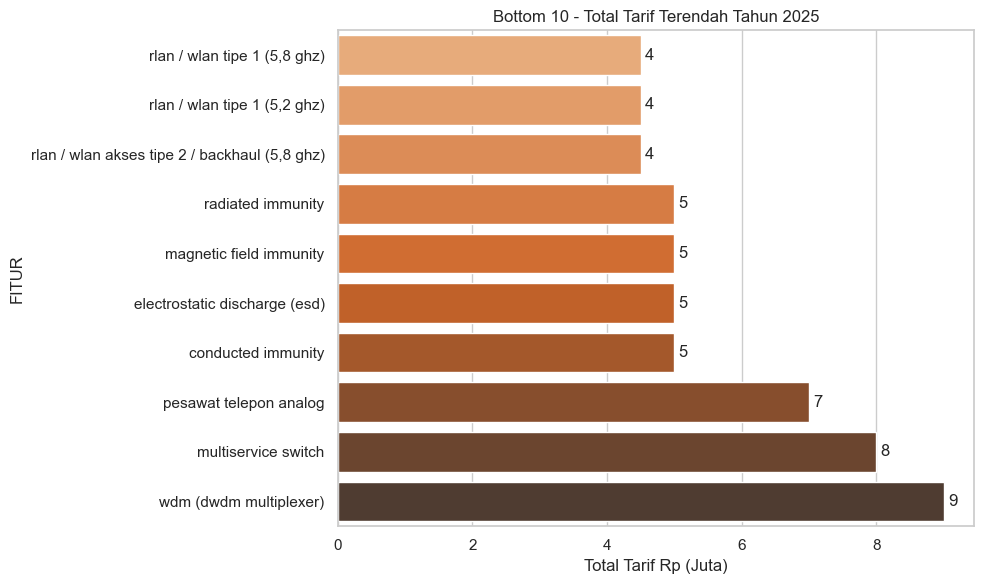

In [20]:
combined_data = pd.DataFrame()
for sheet, df in data_sheets.items():
    df['TAHUN'] = int(float(sheet))
    combined_data = pd.concat([combined_data, df], ignore_index=True)

# Pastikan PRICE_REG numerik
combined_data['PRICE_REG'] = pd.to_numeric(combined_data['PRICE_REG'], errors='coerce')

# Hitung total tarif per FITUR_GROUP per tahun
tarif_per_tahun = combined_data.groupby(['TAHUN', 'FITUR_GROUP'])['PRICE_REG'].sum().reset_index(name='Total_Tarif')

# Loop untuk tiap tahun
tahun_list = sorted(tarif_per_tahun['TAHUN'].unique())

for tahun in tahun_list:
    data_tahun = tarif_per_tahun[tarif_per_tahun['TAHUN'] == tahun]

    # Top 10 Total Tarif
    top10_tarif = (
        data_tahun.sort_values(by='Total_Tarif', ascending=False)
        .head(10)
        .assign(Total_Tarif=lambda df: df['Total_Tarif'] / 1e6)
    )
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=top10_tarif, y="FITUR_GROUP", x="Total_Tarif", palette="Greens_d")
    plt.title(f"Top 10 - Total Tarif Tertinggi Tahun {tahun}")
    plt.xlabel("Total Tarif Rp (Juta)")
    plt.ylabel("FITUR")

    # Tambahkan label pada bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)

    plt.tight_layout()
    plt.savefig(f"top10_total_tarif_{tahun}.png")

    # Bottom 10 Total Tarif
    bottom10_tarif = (
        data_tahun.sort_values(by='Total_Tarif', ascending=True)
        .head(10)
        .assign(Total_Tarif=lambda df: df['Total_Tarif'] / 1e6)
    )
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=bottom10_tarif, y="FITUR_GROUP", x="Total_Tarif", palette="Oranges_d")
    plt.title(f"Bottom 10 - Total Tarif Terendah Tahun {tahun}")
    plt.xlabel("Total Tarif Rp (Juta)")
    plt.ylabel("FITUR")

    # Tambahkan label pada bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', padding=3)

    plt.tight_layout()
    plt.savefig(f"bottom10_total_tarif_{tahun}.png")


C:\Users\asus\AppData\Local\Temp\ipykernel_9608\903441650.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_total_tarif, y='FITUR_GROUP', x='Total_Tarif', palette='Greens_d')
C:\Users\asus\AppData\Local\Temp\ipykernel_9608\903441650.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom10_total_tarif, y='FITUR_GROUP', x='Total_Tarif', palette='Oranges_d')


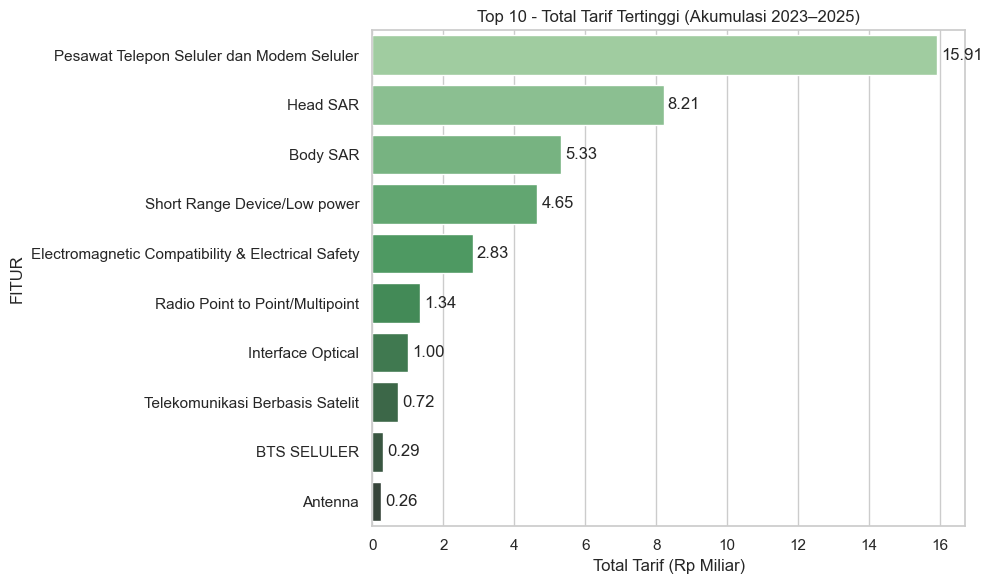

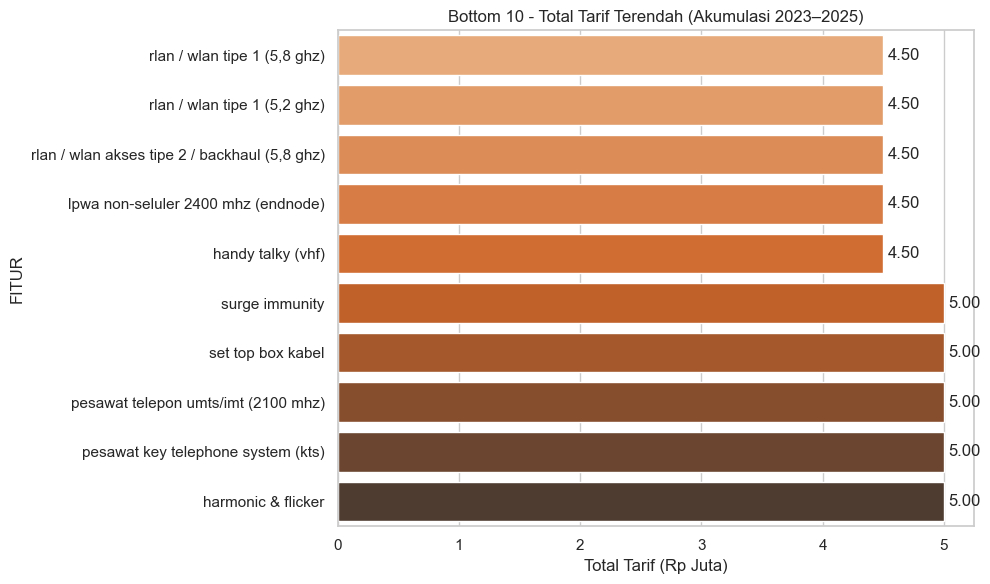

In [34]:
# Filter hanya tahun 2023–2025
data_3years = combined_data[combined_data['TAHUN'].isin([2023, 2024, 2025])]

# Hitung total tarif per FITUR_GROUP secara akumulatif
akumulasi_tarif = (
    data_3years.groupby('FITUR_GROUP')['PRICE_REG']
    .sum()
    .reset_index(name='Total_Tarif')
)

# Top 10 FITUR_GROUP dengan tarif tertinggi
top10_total_tarif = (
    akumulasi_tarif.sort_values(by='Total_Tarif', ascending=False)
    .head(10)
    .assign(Total_Tarif=lambda df: df['Total_Tarif'] / 1e9)  # Konversi ke juta
)

# Bottom 10 FITUR_GROUP dengan tarif terendah
bottom10_total_tarif = (
    akumulasi_tarif.sort_values(by='Total_Tarif', ascending=True)
    .head(10)
    .assign(Total_Tarif=lambda df: df['Total_Tarif'] / 1e6)  # Konversi ke juta
)

# Plot Top 10
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top10_total_tarif, y='FITUR_GROUP', x='Total_Tarif', palette='Greens_d')
plt.title("Top 10 - Total Tarif Tertinggi (Akumulasi 2023–2025)")
plt.xlabel("Total Tarif (Rp Miliar)")
plt.ylabel("FITUR")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.tight_layout()
plt.savefig("top10_total_tarif_akumulasi.png")

# Plot Bottom 10
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=bottom10_total_tarif, y='FITUR_GROUP', x='Total_Tarif', palette='Oranges_d')
plt.title("Bottom 10 - Total Tarif Terendah (Akumulasi 2023–2025)")
plt.xlabel("Total Tarif (Rp Juta)")
plt.ylabel("FITUR")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.tight_layout()
plt.savefig("bottom10_total_tarif_akumulasi.png")


In [42]:

from statsmodels.tsa.seasonal import seasonal_decompose

# --- Step 1: Persiapan Data ---
# Misal dataframe kamu bernama df dan memiliki kolom tanggal dan total tarif
# Pastikan kolom tanggal sudah datetime, ganti 'TANGGAL' dengan nama kolom tanggal kamu
df['JADWAL_MULAI'] = pd.to_datetime(df['JADWAL_MULAI'], errors='coerce')

# Buat kolom YearMonth untuk agregasi bulanan
df['YearMonth'] = df['JADWAL_MULAI'].dt.to_period('M')
print(df.columns)



Index(['FULLNAME', 'FITUR_GROUP', 'EQP_NAME', 'RESI_NO', 'PRICE_REG',
       'JADWAL_MULAI', 'TAHUN', 'YearMonth'],
      dtype='object')


In [1]:
# Agregasi: jumlah pengujian dan total tarif per bulan
bulanan = df.groupby('YearMonth').agg({
    'PRICE_REG': 'sum',
    'RESI_N0': 'sum'
}).reset_index()

# Convert YearMonth ke timestamp untuk plot
bulanan['YearMonth'] = bulanan['YearMonth'].dt.to_timestamp()

# --- Step 2: Visualisasi Tren Total Tarif Bulanan ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=bulanan, x='YearMonth', y='Total_Tarif', marker='o')
plt.title('Tren Total Tarif Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Tarif (Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('tren_total_tarif_bulanan.png')
plt.show()

# --- Step 3: Heatmap Total Tarif Bulanan per Tahun ---
# Tambahkan kolom Tahun dan Bulan untuk pivot table
bulanan['Tahun'] = bulanan['YearMonth'].dt.year
bulanan['Bulan'] = bulanan['YearMonth'].dt.month

pivot_tarif = bulanan.pivot(index='Tahun', columns='Bulan', values='Total_Tarif')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_tarif, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Heatmap Total Tarif per Bulan dan Tahun")
plt.xlabel("Bulan")
plt.ylabel("Tahun")
plt.savefig('heatmap_total_tarif_bulanan.png')
plt.show()

# --- Step 4: Seasonal Decomposition ---
# Set index menjadi datetime
bulanan_ts = bulanan.set_index('YearMonth')

# Resample untuk pastikan tidak ada missing month
bulanan_ts = bulanan_ts['Total_Tarif'].resample('M').sum()

# Lakukan dekomposisi (model bisa 'additive' atau 'multiplicative')
result = seasonal_decompose(bulanan_ts, model='additive')

# Plot hasil dekomposisi
result.plot()
plt.suptitle('Seasonal Decomposition Total Tarif Bulanan', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('dekomposisi_total_tarif_bulanan.png')
plt.show()

NameError: name 'df' is not defined